In [1]:
import pandas as pd
import numpy as np 

In [7]:
df = pd.read_excel("mic2.xlsx")
df

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree
5,27,Female,Student,"<10,000",3,3,3,3,3,3,...,3,4,Taste,No,.no,Combo_CRC,Chocolate,single flavoured,neutral,agree
6,48,Female,House wife,"<10,000",4,4,4,4,4,4,...,4,4,Taste,No,Texture defect,Combo_VCS,Vanila,single flavoured,neutral,agree
7,15,Female,Student,"<10,000",3,4,4,4,5,5,...,5,5,Taste,No,NaN,Combo_CRC,Caramel,More than one flavoured,agree,agree
8,28,Female,Student,"10,000 - 20,000",3,3,3,4,4,3,...,3,4,Quality,No,Quality issues,Combo_VCS,Chocolate,More than one flavoured,neutral,agree
9,24,Male,Engineer,"<10,000",3,5,4,5,5,5,...,4,5,Quality,No,NaN,Combo_VCS,Chocolate,single flavoured,agree,agree


In [33]:
def custom_cls(x):
  if (0<= x <=20):
    return '<=20'
  elif(21<= x <=30):
    return '21-30'
  elif(31<= x <=40):
    return '31-40'
  else:
    return '> 40'

In [34]:
df['AgeGP'] = df.apply(lambda tbl: custom_cls(tbl['Age']),
                       axis=1)
#Crea una nueva columna y categoriza a cada una de las filas
df.head()

,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,Taste,Flavours,...,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend,AgeGP
0,31,Male,Research,">40, 000",5,5,5,4,4,5,...,4,Taste,No,NaN,Combo_VLM,Chocolate,More than one flavoured,agree,agree,31-40
1,25,Male,student,"<10,000",3,5,3,4,5,5,...,4,Taste,No,Quantity issues,Combo_VCS,Chocolate,More than one flavoured,neutral,neutral,21-30
2,45,Female,Teaching,">40, 000",3,4,4,4,3,4,...,4,Taste,No,NaN,Combo_VCS,Caramel,More than one flavoured,disagree,neutral,> 40
3,27,Male,Student,"<10,000",5,5,3,4,5,5,...,4,Taste,No,NaN,Combo_VCS,Strawbery,More than one flavoured,agree,agree,21-30
4,23,Female,Tutor,"10,000 - 20,000",5,5,4,4,5,5,...,5,Quality,No,NaN,Combo_VCS,Vanila,single flavoured,agree,Strongly agree,21-30


In [35]:
df.columns

Index(['Age', 'Sex', 'Ocupation', 'Monthly income ', 'Price', 'Quality',
       'Quantity', 'Availability', 'Taste', 'Flavours', 'Customer relation',
       'Customer services', 'Texture', 'Size', 'Overal satisfaction',
       'Consistency', 'Factor', 'Frowned', 'reason', 'Popular', 'My favorite',
       'Kind', 'Preference', 'Recommend', 'AgeGP'],
      dtype='object')

In [36]:
age_gender = df.groupby (['AgeGP', 'Sex' ]).size()
age_gender = age_gender.to_frame()
age_gender

0
AgeGP Sex       
21-30 Female  11
      Male    20
31-40 Female   4
      Male     1
<=20  Female   5
      Male     6
> 40  Female   2
      Male     1

In [37]:
age_sex = pd.pivot_table(index = ['AgeGP', 'Sex'],
                         aggfunc = len,
                         values = 'Availability',
                         data = df,
                         margins = True
)

age_sex      


Availability
AgeGP Sex                 
21-30 Female            11
      Male              20
31-40 Female             4
      Male               1
<=20  Female             5
      Male               6
> 40  Female             2
      Male               1
All                     50

In [38]:
age_gender = age_gender.rename(columns = {0: 'Count'})
age_gender = age_gender.reset_index()
age_gender.columns

Index(['AgeGP', 'Sex', 'Count'], dtype='object')

In [39]:
age_gender

,AgeGP,Sex,Count
0,21-30,Female,11
1,21-30,Male,20
2,31-40,Female,4
3,31-40,Male,1
4,<=20,Female,5
5,<=20,Male,6
6,> 40,Female,2
7,> 40,Male,1


In [40]:
x = age_gender.iloc[ : , -1].sum()
x
age_gender['%'] = (age_gender.iloc[:, -1]/x)*100
age_gender

,AgeGP,Sex,Count,%
0,21-30,Female,11,22.0
1,21-30,Male,20,40.0
2,31-40,Female,4,8.0
3,31-40,Male,1,2.0
4,<=20,Female,5,10.0
5,<=20,Male,6,12.0
6,> 40,Female,2,4.0
7,> 40,Male,1,2.0


In [44]:
plot_order = ['<=20','21-30','31-40','> 40']


In [45]:
import seaborn as sns 

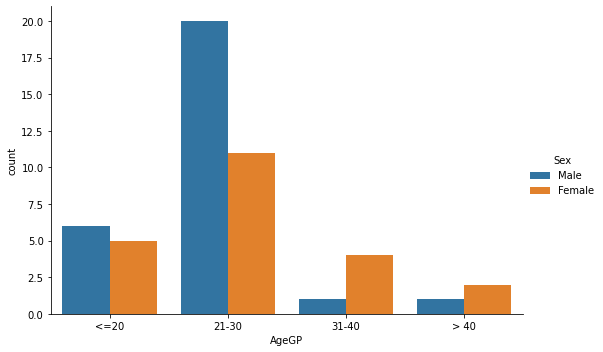

In [47]:
g = sns.catplot(x = 'AgeGP',
                kind = 'count',
                data = df,
                hue = 'Sex', #variable categorica para que lo separe en colores
                order = plot_order,
                height = 5,
                aspect = 1.5,


)

In [48]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
import plotly.express as px 


In [51]:
fig = px.sunburst(age_gender,
                  values = 'Count',
                  path =['Sex','AgeGP', 'Count'],
                  color = 'AgeGP',
                  title = 'Number of respondants by AgeGP and Gender')
plt.savefig('sample_data/age_groupSun.png')
fig.show()

<Figure size 432x288 with 0 Axes>

In [55]:
pip install dash 


     |████████████████████████████████| 9.6 MB 9.8 MB/s 
     |████████████████████████████████| 357 kB 54.4 MB/s 


In [56]:
from dash import html 

In [57]:
from dash import dcc

In [59]:
pip install jupyter_dash

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=0ad001bd05df2519f29131b9b31bafe03552deb3e8f03c717f9f4b2ac9848ebb
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [60]:
from jupyter_dash import JupyterDash

In [62]:
p2 = JupyterDash(__name__) #para agregar graficas a un dashbord 
p2.layout = html.Div(children=[html.H1('Title',
                                       ),
                               dcc.Graph(figure=fig),
]
)
if __name__ == '__main__':
  p2.run_server()

Dash app running on:


<IPython.core.display.Javascript object>